<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/25_07_23ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import pandas as pd
import numpy as np

In [360]:
df = pd.read_csv('salaries.csv', sep =';')
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,United States,90000,United States,Medium,2023


Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono
“missing values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire?
_________ Il livello di conoscenza (Expertise Level) è un attributo significativo nel determinare il
livello di esperienza? (punti 2)

In [361]:
print(f'Numero istanze: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero istanze: 3470
Numero colonne: 9


In [362]:
df.isnull().values.sum() #0 missing values

np.int64(0)

In [363]:
df['Experience Level'].value_counts() #il dataset non è bilanciato

,count
Experience Level,
Senior,2187
Mid,833
Entry,296
Executive,154


In [364]:
df['Experience Level'].unique()

array(['Senior', 'Entry', 'Mid', 'Executive'], dtype=object)

In [365]:
df['Expertise_map'] = df['Expertise Level'].map({'Expert': 0, 'Intermediate': 1,'Junior':2,'Director':3})
df['Experience_map'] = df['Experience Level'].map({'Senior': 0, 'Entry': 1,'Mid':2,'Executive':3})
df.groupby("Expertise_map")['Experience_map'].mean() #come si può vedere, c'è una corrispondenza 1 a 1 tra il livello di conoscenza e il livello di esperienza

,Experience_map
Expertise_map,
0,0.0
1,2.0
2,1.0
3,3.0


Verificare se il salario medio varia rispetto alla dimensione dell’impresa ("Company Size"), sia
nel complesso sia relativamente al livello di esperienza (punti 2). Quanti sono i data scientist
che non risiedono nella nazione della impresa per cui lavorano (punti 1)?

In [366]:
df.groupby("Company Size")['Salary in USD'].mean() #nel complesso si può osservare che in base alla dimensione dell'aziende si può osservare una differenza di salario medio

,Salary in USD
Company Size,
Large,118216.078603
Medium,149195.084295
Small,87487.189542


In [367]:
df.pivot_table(
    values='Salary in USD',
    index='Company Size',
    columns='Experience Level',
    aggfunc='mean'
)

#possiamo vedere che in base alla dimensione dell'azienda e al livello di esperienza del dipende possiamo osservare delle variazioni nello stipendio medio

Experience Level,Entry,Executive,Mid,Senior
Company Size,,,,
Large,76546.319149,181610.470588,91286.455172,151602.455446
Medium,84644.038217,190706.798450,116671.653543,162317.830237
Small,68835.644444,169172.375000,68613.075472,112724.765957


In [368]:
df[df['Company Location'] != df['Employee Residence']].shape[0] #107 datascientis

107

Il salario ricevuto dai lavoratori (Salary in USD) è distribuito nello stesso modo nelle imprese
di piccola, media e grande dimensione? Rappresentare con il/gli opportuni grafici il concetto. Il
salario ha poi la stessa distribuzione all’interno dei livelli di esperienza? (punti 3)

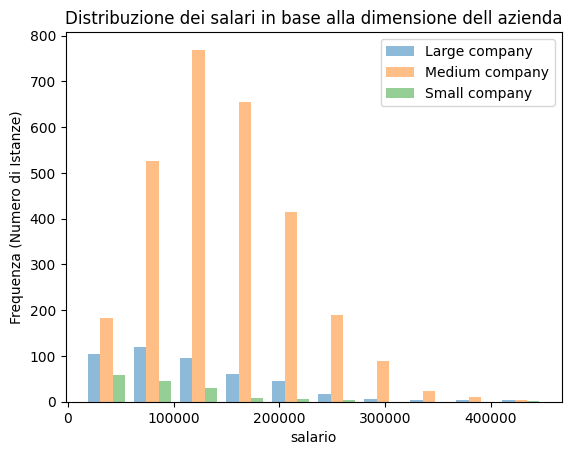

In [369]:
import matplotlib.pyplot as plt

# Si passa una lista di array al metodo hist, che li plottà in overlay
plt.hist(
    [df[df['Company Size']=='Large']['Salary in USD'],df[df['Company Size']=='Medium']['Salary in USD'],df[df['Company Size']=='Small']['Salary in USD']],
    #bins=15, # Numero di barre per l'istogramma, di deafult impostato a 10

    label=['Large company', 'Medium company','Small company'],

    alpha=0.5, #intenistà colore

)

plt.title('Distribuzione dei salari in base alla dimensione dell azienda')
plt.xlabel('salario')
plt.ylabel('Frequenza (Numero di Istanze)')
plt.legend(loc='upper right')
plt.show()

#possiamo osservare che le aziende hanno distribuzioni differenti in base alla loro dimensione


<Axes: xlabel='Company Size'>

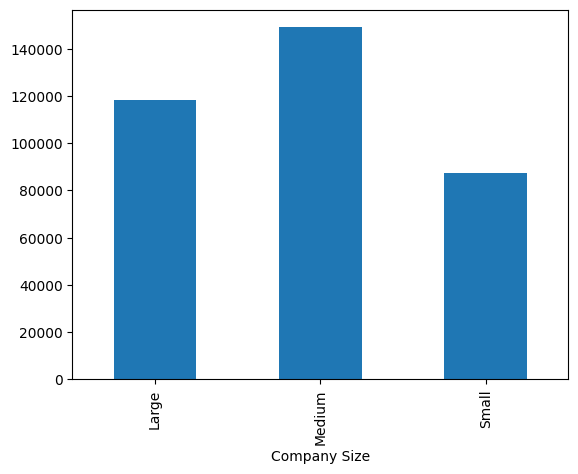

In [370]:
df.groupby('Company Size')['Salary in USD'].mean().plot(kind='bar')

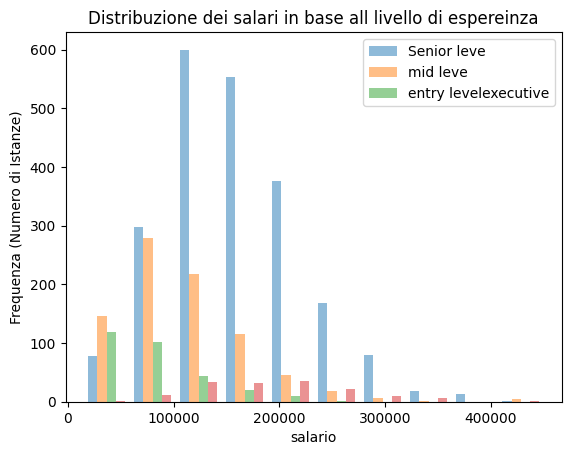

In [371]:
import matplotlib.pyplot as plt

# Si passa una lista di array al metodo hist, che li plottà in overlay
plt.hist(
    [df[df['Experience Level']=='Senior']['Salary in USD'],df[df['Experience Level']=='Mid']['Salary in USD'],df[df['Experience Level']=='Entry']['Salary in USD'],df[df['Experience Level']=='Executive']['Salary in USD']],
    #bins=15, # Numero di barre per l'istogramma, di deafult impostato a 10

    label=['Senior leve', 'mid leve','entry level' 'executive'],

    alpha=0.5, #intenistà colore

)

plt.title('Distribuzione dei salari in base all livello di espereinza')
plt.xlabel('salario')
plt.ylabel('Frequenza (Numero di Istanze)')
plt.legend(loc='upper right')
plt.show()

#possiamo osservare che la distribuzione dei salari varia a seconda del livello di esperienza


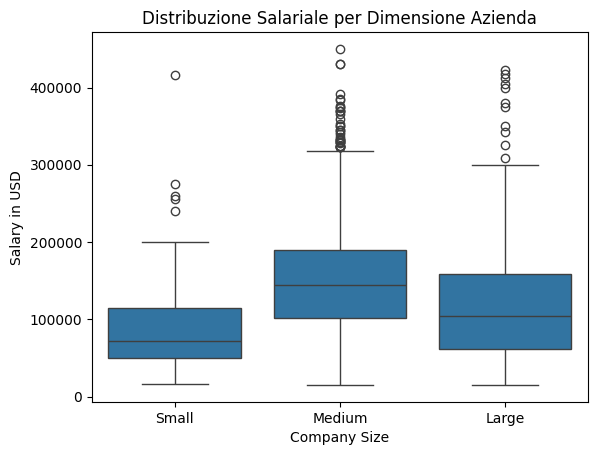

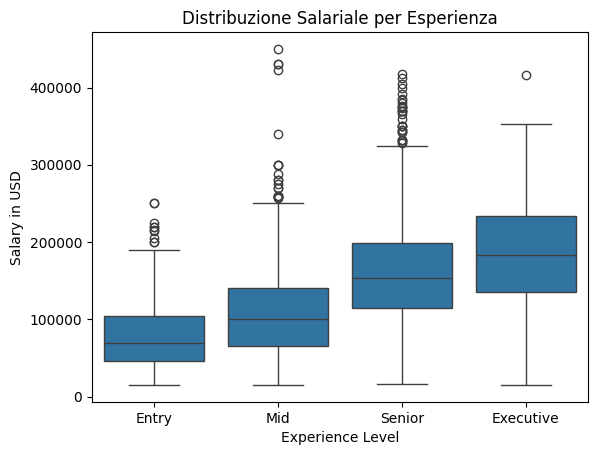

In [372]:
#si poteva anche pensare di risolverlo con un box plot nel seguente modo
import seaborn as sns

# 1. Distribuzione per Dimensione Impresa
# Definiamo l'ordine per una lettura logica (Piccola -> Media -> Grande)
order_size = ['Small', 'Medium', 'Large']
sns.boxplot(data=df, x='Company Size', y='Salary in USD', order=order_size)
plt.title('Distribuzione Salariale per Dimensione Azienda')
plt.show()

# 2. Distribuzione per Livello di Esperienza
order_exp = ['Entry', 'Mid', 'Senior', 'Executive']
sns.boxplot(data=df, x='Experience Level', y='Salary in USD', order=order_exp)
plt.title('Distribuzione Salariale per Esperienza')
plt.show()

 Quali sono i 5 lavori (Job Title) più remunerativi? (punti 2).

In [373]:
df.groupby('Job Title')['Salary in USD'].mean().sort_values(ascending=False)[0:5]
#i top 5 lavori più remunerativi sono Analytics Engineering ManagerData Science Tech Lead	Managing Director Data Science AWS Data Architect	Cloud Data Architect

,Salary in USD
Job Title,
Analytics Engineering Manager,399880.0
Data Science Tech Lead,375000.0
Managing Director Data Science,300000.0
AWS Data Architect,258000.0
Cloud Data Architect,250000.0


---------------------------------------
PARTE 2
-------------------------------------------

In [374]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

1. Si vuole predire il valore di Experience Level sulla base degli attributi presenti nel dataset.
Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta),
eliminare le istanze che eventualmente contengono valori nulli, rendere tutti gli attributi
numerici utilizzando un ordinal encoder, e dividerlo in modo che 3/4 degli elementi siano
contenuti in un nuovo dataset “train” e 1/4 nel dataset “test”.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello KNeighborsClassifier. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix e la predizione
effettuata da un dummy classifier (punti 3)

In [375]:
df = pd.read_csv('salaries.csv', sep =';')
df.drop('Expertise Level',axis = 1,inplace = True) #c'è una corrispondenza 1 a 1 tra experience level e expertice level. se mantenessi questo attrbuto le reti imparerebbero che è sufficente osservare questo per predirre il risultato
df.dropna(inplace=True) #elimino valori nulli, in questo caso non ce ne sono.

categorical_cols = [cname for cname in df.columns if
                    df[cname].dtype == "object"]

oe = OrdinalEncoder()
df[categorical_cols] = oe.fit_transform(df[categorical_cols])

In [376]:
X = df.drop('Experience Level', axis = 1)
y = df['Experience Level'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [377]:
models = {'DecisionTree': DecisionTreeClassifier(),
          'KN': KNeighborsClassifier(),
          'Dummy': DummyClassifier(strategy="most_frequent")}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #possiamo osservare che il decision tree riesce ad ottenere un ottimo risultato sul training set che va a peggioare notevolevmente (come si osservare anche dalla confusion matrix)
  #sul test set. questo può essere sintomo di overfitting

  #il kn classifier performa peggio del decision tree sotto tutto i punti di vista. in questo caso non sembra esserci overfitting però il risultato che otteniamo sul test è comunque poco soddisfacente

  #per quanto riguarda il dummy classifier, utilizza un approccio most frequent per cui assegna ciascuna istanza alla classe più probabile. in questo caso abbiamo visto che il dataset è sbilancaito. quindi
  #osservando strattemtne l'accurcy il risultato ottenuto non è malvagio, però osservando la cunfiosn matrix possiamo osservare tutte le debolezze del modello

 ===== DecisionTree =====
accuracy on train 0.93543428132206
accuracy on test 0.5276497695852534
confusion matrix on train 
 [[ 222    0    0    0]
 [   5  110    0    0]
 [  22   14  589    0]
 [  23   25   79 1513]]
confusion matrix on test 
 [[ 22   1  31  20]
 [  3   9  11  16]
 [ 35   6  70  97]
 [ 40  28 122 357]]
 ===== KN =====
accuracy on train 0.7248270561106841
accuracy on test 0.5841013824884793
confusion matrix on train 
 [[ 115    1   58   48]
 [   3   18   28   66]
 [  62   13  342  208]
 [  41   16  172 1411]]
confusion matrix on test 
 [[ 16   1  37  20]
 [  1   0   5  33]
 [ 27   4  73 104]
 [ 21  12  96 418]]
 ===== Dummy =====
accuracy on train 0.6302843966179862
accuracy on test 0.630184331797235
confusion matrix on train 
 [[   0    0    0  222]
 [   0    0    0  115]
 [   0    0    0  625]
 [   0    0    0 1640]]
confusion matrix on test 
 [[  0   0   0  74]
 [  0   0   0  39]
 [  0   0   0 208]
 [  0   0   0 547]]


Trovare i parametri migliori del classificatore DecisionTree. Agire sui parametri criterion e
min_samples_leaf. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera
quella con i parametri di default ottenuta al punto 1 (punti 4)

In [378]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[2,5,7,10,20]
}

gd_dt = GridSearchCV(DecisionTreeClassifier(),
                     parameters,
                     scoring='accuracy',
                     cv=5)

gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 5, 7, 10, 20]},
             scoring='accuracy')

In [379]:
best_par = gd_dt.best_params_
best_par

{'criterion': 'gini', 'min_samples_leaf': 10}

In [380]:
best_score = gd_dt.best_score_
best_score

np.float64(0.6591008415768492)

In [381]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"accuracy on train {accuracy_score(y_train, y_train_pred_best)}")
print(f"accuracy on test {accuracy_score(y_test, y_test_pred_best)}")

#agendo sui parametri del decision tree osserviamo che l'accuracy sul training set diminuisce e quella sul test aumenta. è sintomo che
#così facendo è migliorato il problema dell'overfitting

accuracy on train 0.7286702536510377
accuracy on test 0.6474654377880185


Creare una pipeline che a partire dal dataset numerico utilizzato nel punto 1 applichi

 il SimpleImputer per sostituire eventuali valori nulli (punti 1)

 divida in 10 bins i valori di Salary in USD (punti 2)

 applichi il DecisionTreeClassifier per effettuare la predizione
(punti 1)

In [382]:
df = pd.read_csv('salaries.csv', sep =';')
df.drop('Expertise Level',axis = 1,inplace = True) #c'è una corrispondenza 1 a 1 tra experience level e expertice level. se mantenessi questo attrbuto le reti imparerebbero che è sufficente osservare questo per predirre il risultato

categorical_cols = [cname for cname in df.columns if
                    df[cname].dtype == "object"]

oe = OrdinalEncoder()
df[categorical_cols] = oe.fit_transform(df[categorical_cols])

X = df.drop('Experience Level', axis = 1)
y = df['Experience Level'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [383]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 10), X_train.columns.get_indexer(['Salary in USD'])),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('simple', SimpleImputer(strategy='most_frequent')),
                              ('col_tran', col_tran),
                              ('model', DecisionTreeClassifier()),
                             ])
pipeline

Pipeline(steps=[('simple', SimpleImputer(strategy='most_frequent')),
                ('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=10),
                                                  array([3]))])),
                ('model', DecisionTreeClassifier())])

In [384]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}") #accuracy ottenuta è confrontabile con quella ottenuta con i migliori parametri del decision tree

accuracy on test 0.6221198156682027


Estendere la pipeline del punto precedente aggiungendo a ogni feature una nuova feature che
rappresenti il valore della feature normalizzato. Applicare il DecisionTreeClassifier per
effettuare la predizione

In [385]:
#aggiungo il feature unione

combined_features = FeatureUnion([("coltran", col_tran),('scaler', StandardScaler())])

my_pipeline = Pipeline(steps=[('simple', SimpleImputer(strategy='most_frequent')),
                              ('combined_features', combined_features),
                              ('model', DecisionTreeClassifier()),
                             ])
my_pipeline

Pipeline(steps=[('simple', SimpleImputer(strategy='most_frequent')),
                ('combined_features',
                 FeatureUnion(transformer_list=[('coltran',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('discr',
                                                                                  KBinsDiscretizer(n_bins=10),
                                                                                  array([3]))])),
                                                ('scaler', StandardScaler())])),
                ('model', DecisionTreeClassifier())])

In [386]:
my_pipeline.fit(X_train, y_train)
y_pred_pl = my_pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}") #accuracy ottenuta è confrontabile con quella ottenuta con i migliori parametri del decision tree

accuracy on test 0.5264976958525346


In [387]:
######CHAT SOLUTION-> NELLA MIA NON C'è UNA VERA E PROPRIO REPLICAZIONE DELLE CLASSI##########

original_features = Pipeline(steps=[
    ('identity', 'passthrough')
])

normalized_features = Pipeline(steps=[
    ('scaler', StandardScaler())
])


combined_features = FeatureUnion([
    ('original', original_features),
    ('normalized', normalized_features)
]) #[X1, X2, X3, ..., X1_norm, X2_norm, X3_norm, ...]

pipeline_p4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('features', combined_features),
    ('model', DecisionTreeClassifier(random_state=42))
])

pipeline_p4.fit(X_train, y_train)

y_pred_test = pipeline_p4.predict(X_test)
acc_p4 = accuracy_score(y_test, y_pred_test)

print(f"Accuracy punto 4: {acc_p4:.3f}")

Accuracy punto 4: 0.532


 Creare una pipeline che a partire dal dataset iniziale (dopo aver tolto le colonne rimosse al
punto 1)

 usi il SimpleImputer per inserire i valori nulli (punti 0.5)

 trasformi in vettori booleani (OneHotEncoder, sparse_output=False) le colonne 'Job Title',
'Employment Type', 'Company Location', 'Employee Residence' (punti 2)

 trasformi in valori numerici le colonne 'Year', 'Company Size' (punti 1)

 Applichi lo standard scaler sulla colonna Salary in USD (punti 1)

 applichi il DecisionTreeClassifier per effettuare la predizione (punti 0.5)

In [388]:
df = pd.read_csv('salaries.csv', sep =';')
df.drop('Expertise Level',axis = 1,inplace = True) #c'è una corrispondenza 1 a 1 tra experience level e expertice level. se mantenessi questo attrbuto le reti imparerebbero che è sufficente osservare questo per predirre il risultato

X = df.drop('Experience Level', axis = 1)
y = df['Experience Level'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Bool_cols = ['Job Title','Employment Type', 'Company Location', 'Employee Residence']
num_cols = ['Year','Company Size']

In [389]:
col_tran = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), X_train.columns.get_indexer(Bool_cols)),
        ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',
            unknown_value=-1),X_train.columns.get_indexer(num_cols)),
        ('std', StandardScaler(), X_train.columns.get_indexer(['Salary in USD']))
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('simple', SimpleImputer(strategy='most_frequent')),
                              ('col_tran', col_tran),
                              ('model', DecisionTreeClassifier()),
                             ])
pipeline

Pipeline(steps=[('simple', SimpleImputer(strategy='most_frequent')),
                ('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  array([0, 1, 2, 4])),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  array([6, 5])),
                                                 ('std', StandardScaler(),
                                                  array([3]))])),
                ('model', DecisionTreeClassifier())])

In [390]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}") #l'accuracy che si ottiene rimane confrontabile con quella ottenuta

accuracy on test 0.5472350230414746


E’ possibile utilizzare un regressore linerare al posto del DecisionTree? In che modo? (punti 2).

In [391]:

#ho 4 classi, non posso fare come la volta scorsa con una soglia a 0.5, occorrre farlo in questa variante

from sklearn.linear_model import LinearRegression

df = pd.read_csv('salaries.csv', sep =';')
df.drop('Expertise Level',axis = 1,inplace = True) #c'è una corrispondenza 1 a 1 tra experience level e expertice level. se mantenessi questo attrbuto le reti imparerebbero che è sufficente osservare questo per predirre il risultato
df.dropna(inplace=True) #elimino valori nulli, in questo caso non ce ne sono.

categorical_cols = [cname for cname in df.columns if
                    df[cname].dtype == "object"]

oe = OrdinalEncoder()
df[categorical_cols] = oe.fit_transform(df[categorical_cols])

X = df.drop('Experience Level', axis = 1)
y = df['Experience Level'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# regressore lineare
lr = LinearRegression()
lr.fit(X_train, y_train)

# predizioni continue
y_pred_cont = lr.predict(X_test)

# Arrotondamento alla classe più vicina
y_pred_class = np.round(y_pred_cont)

# Clipping per restare nel range valido [0, 3]
y_pred_class = np.clip(y_pred_class, 0, 3).astype(int)

# valutazione
acc_lr = accuracy_score(y_test, y_pred_class)
print(f"Accuracy con regressione lineare: {acc_lr:.3f}")

Accuracy con regressione lineare: 0.462
